检验minimize结果稳定性及是否符合实际意义：能力越大，得分越大

In [1]:
from __future__ import division
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%precision 4
plt.style.use('ggplot')
np.random.seed(1234)
import pymc
import scipy.stats as stats
from scipy.optimize import minimize, rosen, rosen_der

In [298]:
def min_thete_b(y,w,a):
    start1 = y.shape[0]
    start2 = y.shape[0]*2
    start3 = y.shape[0]*2+y.shape[1]
    bnds = ((-3, 3), (-3, 3))*(sum(y.shape))
    def f(x):
        t1 = np.array(x[:start1]).reshape(y.shape[0],1)
        b1 = np.array([x[start2:start3]])
        t2 = np.array(x[start1:start2]).reshape(y.shape[0],1)
        b2 = np.array([x[start3:]])
        p1 = (1./(1+ np.exp(-(t1-b1)))).reshape(y.shape)
        p2 = (1./(1+ np.exp(-(t2-b2)))).reshape(y.shape)
        f1 = -(y*(np.log(p1)+np.log(p2))+(1-y)*np.log(1-p1*p2)).sum()/y.shape[1]+w*((np.array([x])**2).sum())
        ft1 = -((y-p1*p2)*(1-p1)/(1-p1*p2)).sum(axis=1)/y.shape[1]+2*w*np.array(x[:start1])
        ft2 = -((y-p1*p2)*(1-p2)/(1-p1*p2)).sum(axis=1)/y.shape[1]+2*w*np.array(x[start1:start2])
        fb1 = ((y-p1*p2)*(1-p1)/(1-p1*p2)).sum(axis=0)/y.shape[1]+2*w*np.array(x[start2:start3])
        fb2 = ((y-p1*p2)*(1-p2)/(1-p1*p2)).sum(axis=0)/y.shape[1]+2*w*np.array(x[start3:])
        
        f2 = np.concatenate((ft1,ft2,fb1,fb2))
        return f1,f2
    res = minimize(f, a, bounds=bnds, method='L-BFGS-B',jac=True,options={"disp":True,"gtol":1e-40,"ftol":1e-40})
    min_t1 = np.array(res.x[:start1]).reshape(y.shape[0],1)
    min_b1 = np.array([res.x[start2:start3]])
    min_t2 = np.array(res.x[start1:start2]).reshape(y.shape[0],1)
    min_b2 = np.array([res.x[start3:]])
    return min_t1,min_t2,min_b1,min_b2,res.fun 

In [25]:
def absm(a,b):
    return np.abs(a-b).mean()

In [485]:
n_items=10
n_stu=100
real_b1 = np.random.normal(0,1,(1,n_items))
real_t1 = np.random.normal(0,1,(n_stu,1))
real_b2 = np.random.normal(0,1,(1,n_items))
real_t2 = np.random.normal(0,1,(n_stu,1))
real_p1 = 1.0/ (1.0 + np.exp(-(real_t1-real_b1))).reshape(n_stu,n_items)
real_p2 = 1.0/ (1.0 + np.exp(-(real_t2-real_b2))).reshape(n_stu,n_items)
real_p = real_p1*real_p2
uv=np.random.random((n_stu,n_items))<real_p1*real_p2
w = 0.01

In [462]:
min_t1 = []
min_t2 = []
min_b1 = []
min_b2 = []
for i in range(100):
    a1 = np.random.normal(0, 1, 2*sum(uv.shape))
    min_t11,min_t21,min_b11,min_b21,cost1 = min_thete_b(uv,w,a1)
    min_t1.append(min_t11)
    min_t2.append(min_t12)
    min_b1.append(min_b11)
    min_b2.append(min_b12)

In [463]:
result = []
for i in range(100):
    for j in range(i+1, 100):
        result.append((absm(min_t1[i],min_t1[j])+absm(min_t2[i],min_t2[j])+absm(min_b1[i],min_b1[j])+absm(min_b2[i],min_b2[j]))/4)
print max(result)

1.05525238546e-06


140-3.21648715148e-07,136-e-06,135-0.04,130-0.04,120-0.115,110-0.172,100-0.19,90-0.229,80-0.268,70-0.347 建议题目数量不小于100，稳定性比较好。

In [409]:
for i in range(10):
    a1 = np.random.normal(0, 1, 2*sum(uv.shape))
    min_t11,min_t21,min_b11,min_b21,cost1 = min_thete_b(uv,w,a1)
    print (absm(min_t11,real_t1)+absm(min_t21,real_t2)+absm(min_b11,real_b1)+absm(min_b21,real_b2))/4

0.582702326415
0.523655900037
0.523655919931
0.582702336401
0.523655961347
0.582702313784
0.582702322179
0.582702321909
0.582702311296
0.582702278475


In [410]:
for i in range(10):
    a2 = np.random.uniform(-3, 3, 2*sum(uv.shape))
    min_t12,min_t22,min_b12,min_b22,cost2 = min_thete_b(uv,w,a2)
    print (absm(min_t12,real_t1)+absm(min_t22,real_t2)+absm(min_b12,real_b1)+absm(min_b22,real_b2))/4

0.58270229149
0.582702351212
0.523655892372
0.523655941444
0.582702343063
0.523655949007
0.58270235147
0.523655983997
0.582702377545
0.582702363503


In [411]:
for i in range(10):
    a3 = np.random.normal(1, 0.1, 2*sum(uv.shape))
    min_t13,min_t23,min_b13,min_b23,cost3 = min_thete_b(uv,w,a3)
    print (absm(min_t13,real_t1)+absm(min_t23,real_t2)+absm(min_b13,real_b1)+absm(min_b23,real_b2))/4

0.523655936811
0.582702367992
0.523655926497
0.523655931463
0.523655942541
0.523655891241
0.523655926251
0.523655921062
0.582702338157
0.582702283561


In [412]:
(absm(min_t11,min_t12)+absm(min_t21,min_t22)+absm(min_b11,min_b12)+absm(min_b21,min_b22))/4

0.0000

In [413]:
(absm(min_t11,min_t13)+absm(min_t21,min_t23)+absm(min_b11,min_b13)+absm(min_b21,min_b23))/4

0.0000

In [414]:
(absm(min_t12,min_t13)+absm(min_t22,min_t23)+absm(min_b12,min_b13)+absm(min_b22,min_b23))/4

0.0000

稳定性良好

In [486]:
# abilitys = np.sqrt((real_t1+3)**2+(real_t2+3)**2)
# difficultys = np.sqrt((real_b1+3)**2+(real_b2+3)**2)
abilitys = ((real_t1+3)+(real_t2+3))/2
difficultys = ((real_b1+3)+(real_b2+3))/2

In [487]:
score = (uv * difficultys).sum(axis = 1)

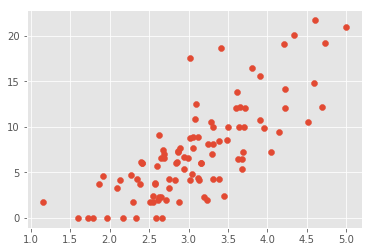

In [488]:
plt.scatter(abilitys.flat,score.flat)

In [489]:
a1 = np.random.normal(0, 1, 2*sum(uv.shape))
min_t1,min_t2,min_b1,min_b2,cost1 = min_thete_b(uv,w,a1)

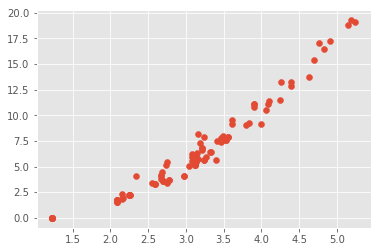

In [490]:
# min_abilitys = np.sqrt((min_t1+3)**2+(min_t2+3)**2)
# min_difficultys = np.sqrt((min_b1+3)**2+(min_b2+3)**2)
min_abilitys = ((min_t1+3)+(min_t2+3))/2
min_difficultys = ((min_b1+3)+(min_b2+3))/2
min_score = (uv * min_difficultys).sum(axis = 1)
plt.scatter(min_abilitys.flat,min_score.flat)

In [491]:
a = np.cov(np.array([min_abilitys.reshape(-1),min_score.reshape(-1)]))
import math
a[0][1]/math.sqrt(a[0][0])/math.sqrt(a[1][1])

0.9637

In [495]:
np.dot(uv,min_difficultys.reshape(-1,1))

0.0000

In [493]:
min_score.shape

(100L,)

In [475]:
a.reshape(-1)

array([1, 3])

In [345]:
(absm(real_t1,min_t1)+absm(real_t2,min_t2)+absm(real_b1,min_b1)+absm(real_b2,min_b2))/4

1.3682

In [346]:
absm(abilitys,min_abilitys)

0.5202

In [347]:
absm(difficultys,min_difficultys)

0.4930

In [348]:
absm(score,min_score)

0.9044

(array([  8.,  18.,  18.,  16.,  17.,  12.,   4.,   4.,   2.,   1.]),
 array([   88.8442,   266.5747,   444.3052,   622.0357,   799.7661,
          977.4966,  1155.2271,  1332.9576,  1510.6881,  1688.4186,
         1866.1491]),
 <a list of 10 Patch objects>)

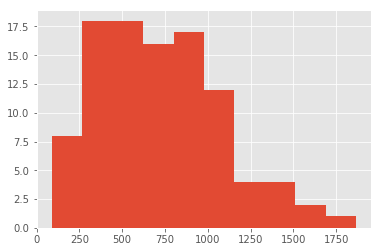

In [320]:
plt.hist(min_score.flat)

(array([ 10.,  17.,  19.,  17.,  16.,  11.,   4.,   3.,   2.,   1.]),
 array([   72.1738,   241.5362,   410.8987,   580.2611,   749.6236,
          918.986 ,  1088.3485,  1257.711 ,  1427.0734,  1596.4359,
         1765.7983]),
 <a list of 10 Patch objects>)

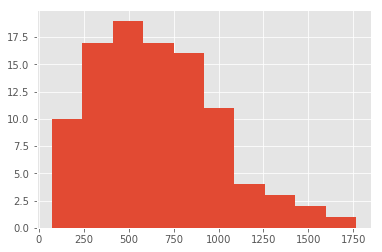

In [321]:
plt.hist(score.flat)

(array([  1.,   4.,  12.,  19.,  28.,  14.,  14.,   3.,   3.,   2.]),
 array([-0.6259, -0.5017, -0.3775, -0.2534, -0.1292, -0.005 ,  0.1192,
         0.2434,  0.3676,  0.4918,  0.6159]),
 <a list of 10 Patch objects>)

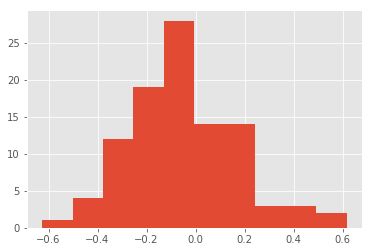

In [322]:
plt.hist((min_abilitys-abilitys).flat)

(array([  2.,   2.,   7.,  15.,  21.,  24.,  18.,   7.,   3.,   1.]),
 array([-0.7525, -0.5914, -0.4303, -0.2691, -0.108 ,  0.0532,  0.2143,
         0.3754,  0.5366,  0.6977,  0.8588]),
 <a list of 10 Patch objects>)

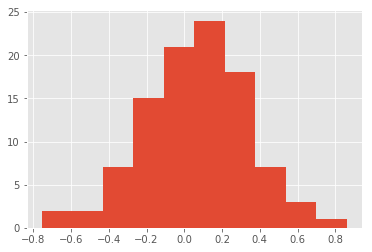

In [244]:
plt.hist((min_difficultys-difficultys).flat)

In [245]:
min_difficultys-difficultys

array([[[ 0.3668,  0.3233,  0.46  , -0.2653, -0.7525,  0.396 , -0.071 ,
          0.0762, -0.1334,  0.2009,  0.5764,  0.1111, -0.3329, -0.0859,
          0.0475, -0.1833,  0.4087,  0.1019,  0.1334, -0.0935,  0.4048,
         -0.3848,  0.0247,  0.0943, -0.0915,  0.0677, -0.3329, -0.3125,
          0.1919,  0.1443,  0.0091,  0.0231, -0.3787,  0.123 ,  0.3411,
         -0.1257, -0.1941, -0.1235,  0.2116,  0.3122,  0.1928,  0.1063,
          0.1728,  0.1408,  0.0368,  0.4532,  0.6651, -0.1969,  0.0051,
         -0.2489, -0.0756,  0.5157, -0.4762,  0.2948, -0.1679,  0.2224,
         -0.1025,  0.0766,  0.2932, -0.1106, -0.1361, -0.0353,  0.3397,
         -0.4779,  0.8588,  0.2495,  0.3612, -0.0202,  0.3027,  0.287 ,
          0.3052,  0.204 ,  0.2991,  0.1795,  0.0436, -0.0702,  0.4396,
         -0.0532, -0.2002,  0.0965,  0.6827,  0.2553, -0.3488, -0.2278,
          0.1237, -0.0844,  0.0222,  0.2569, -0.125 , -0.1326,  0.0088,
          0.3732,  0.1902,  0.1681,  0.1021, -0.0222, -0.6655,  

(array([  1.,   7.,   8.,   5.,  14.,  14.,  15.,  14.,  12.,  10.]),
 array([-107.2897,  -88.3783,  -69.4669,  -50.5555,  -31.6442,  -12.7328,
           6.1786,   25.09  ,   44.0014,   62.9127,   81.8241]),
 <a list of 10 Patch objects>)

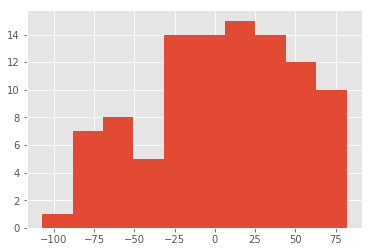

In [246]:
plt.hist((min_score-score).flat)

In [247]:
min_score-score

array([[  14.3078,   37.7282,   14.8053,  -82.5381,  -48.4768,   19.0199,
          51.9752,   81.1905,   -8.7524,   39.5392,   71.2237,    5.7806,
          10.9202,   -4.1515,  -15.2215,   19.1273,   10.9282,   45.6943,
         -62.6379,  -42.1353,  -54.2259,  -79.183 ,   29.9004,   11.7062,
          -3.2288,   36.1109,   37.2075, -107.2897,   65.0739,   66.3577,
          23.1897,  -22.0896,  -23.68  ,   69.2916,   80.9914,  -44.1789,
         -61.1208,  -49.9355,   -6.683 ,   73.1097,  -72.9068,   38.3293,
         -22.0695,   44.0357,   34.7852,   81.8241,   34.5402,  -22.7468,
          59.6433,  -26.5289,  -10.0283,  -12.9438,  -59.9901,   40.9569,
         -78.7229,   44.6684,    8.6864,   24.7342,   21.0695,    9.181 ,
           5.2951,   29.5977,  -88.0289,  -22.8621,   22.906 ,   47.7238,
          42.9199,  -47.3485,  -52.457 ,   37.7642,  -11.7657,  -16.3731,
         -62.2016,   58.4333,  -76.4176,   18.9837,   66.6836,  -23.7789,
          -4.7091,  -22.5857,   28.616

(array([  1.,   1.,   5.,  12.,  19.,  22.,  25.,   9.,   4.,   2.]),
 array([ 0.3217,  0.8185,  1.3152,  1.812 ,  2.3087,  2.8055,  3.3022,
         3.799 ,  4.2957,  4.7925,  5.2892]),
 <a list of 10 Patch objects>)

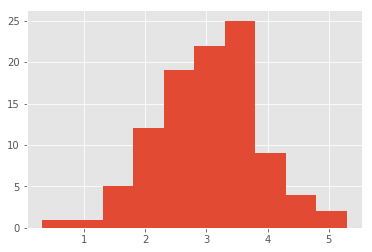

In [249]:
plt.hist(difficultys.flat)

(array([  1.,   3.,   3.,  14.,  12.,  16.,  27.,  16.,   3.,   5.]),
 array([ 1.1806,  1.5162,  1.8518,  2.1874,  2.523 ,  2.8586,  3.1942,
         3.5298,  3.8654,  4.2011,  4.5367]),
 <a list of 10 Patch objects>)

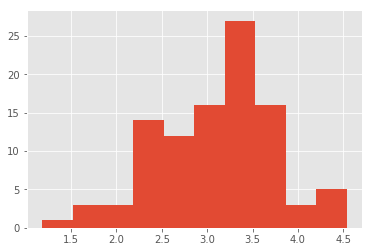

In [250]:
plt.hist(min_difficultys.flat)

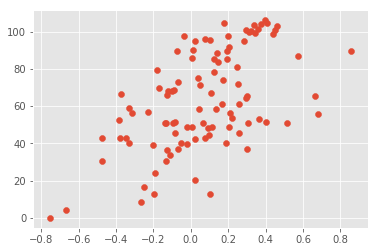

In [254]:
plt.scatter((min_difficultys-difficultys).flat,(min_score).flat)

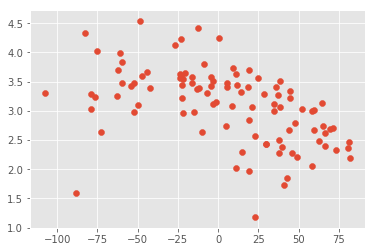

In [256]:
plt.scatter((min_score-score).flat,min_difficultys.flat)